# 桔子还是橙子？

识别水果是机器学习中既简单又常见的应用。

观察桔子和橙子的外形发现：桔子果实较小，常为扁圆形，单果重量约45～130g，果皮橙红或朱红色；橙子果实较大，常为椭圆形，单果重量约120～225g，果皮橙黄色。

这个实例收集的数据包括两个属性：
* weight：重量，指的是单果重量
* color：颜色，主要看偏红还是偏黄，所以只看G-绿色分量

我们的最终目标是，根据参数值的特征，将水果分成两类。

* 尝试1：用降维算法实现聚类

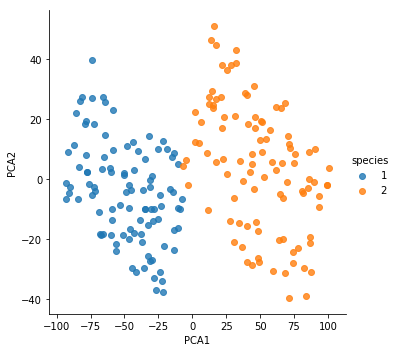

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

# 读取数据集
orange = pd.read_csv('Orange.txt', header = None, delim_whitespace = True, names = ['weight','color','species'])
# 划分数据，将类别属性去除
X_orange = orange.drop("species", axis = 1)
y_orange = orange["species"]
# 构建模型，指定维度为2
model = PCA(n_components = 2)
model.fit(X_orange)
X_2D = model.transform(X_orange)
orange["PCA1"] = X_2D[:, 0]
orange["PCA2"] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue = "species", data = orange, fit_reg = False)

* 尝试2：用K-Means算法实现聚类

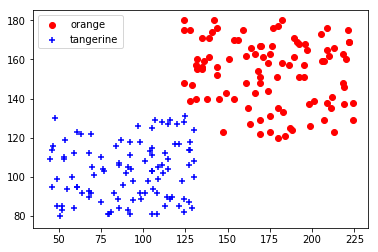

In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 读取数据，CSV文件转化为数组
orange = np.loadtxt(open("orange.csv","rb"), delimiter=",", skiprows=0) 
estimator = KMeans(n_clusters = 2)        # 构造聚类器，3个目标类别
estimator.fit(orange)                    #聚类
label_pred = estimator.labels_          # 获取聚类标签

#绘制k-means结果
x0 = orange[label_pred == 0]
x1 = orange[label_pred == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='orange')
plt.scatter(x1[:, 0], x1[:, 1], c = "blue", marker='+', label='tangerine')
plt.legend(loc=2)
plt.show()

* 尝试3：用高斯混合模型实现聚类

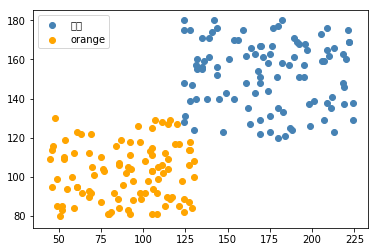

In [12]:
import numpy as np
#from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 读取数据，CSV文件转化为数组
orange = np.loadtxt(open("orange.csv","rb"), delimiter = ",", skiprows = 0) 
# 设置超参数，初始化模型
model = GaussianMixture(n_components = 2, covariance_type='full')
# 拟合数据
model.fit(orange)
# 预测簇标签
predict = model.predict(orange)                                         

x0 = orange[predict == 0]
x1 = orange[predict == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "steelblue",label='tangerine')
plt.scatter(x1[:, 0], x1[:, 1], c = "orange",label='orange')
plt.legend(loc = 2)
plt.show()